<a href="https://colab.research.google.com/github/JulianDR26/Se-ales-y-Sistemas-2024-1S/blob/main/PARCIAL1_SYS_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOLUCIÓN EXAMEN 1 SEÑALES Y SISTEMAS

Julian David Rivera Prada

##PUNTO 1

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

Para resolver este ejercicio lo realicé en dos partes, la primera parte del codigo muestra el proceso de digitalización de la señal dada con la frecuencia de muestreo correspondiente sin asegurar nyquist para ver si la señal presenta o no distorsión. El proceso de discretización correspondiente realizado en clase se muestra de manera detallada en el pdf con la parte escrita.

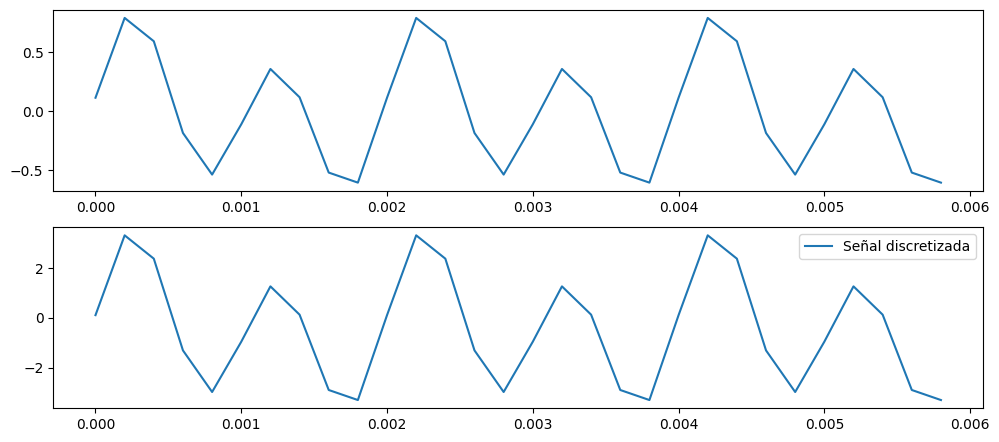

[-3.3        -3.08709677 -2.87419355 -2.66129032 -2.4483871  -2.23548387
 -2.02258065 -1.80967742 -1.59677419 -1.38387097 -1.17096774 -0.95806452
 -0.74516129 -0.53225806 -0.31935484 -0.10645161  0.10645161  0.31935484
  0.53225806  0.74516129  0.95806452  1.17096774  1.38387097  1.59677419
  1.80967742  2.02258065  2.23548387  2.4483871   2.66129032  2.87419355
  3.08709677  3.3       ]


Text(0, 0.5, 'Amplitud')

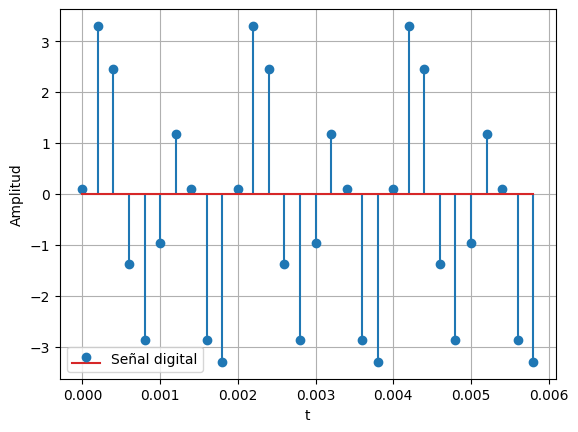

In [15]:
#==========================================================
#   DISCRETIZACIÓN Y CUANTIZACIÓN DE SEÑAL SIN NYQUIST
#==========================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

A=0.3
B=0.6
C=0.1
phi1=np.pi/4
phi2=np.pi

#DEFINICION DE LAS FRECUENCIAS
w1=1000*np.pi
w2=2000*np.pi
w3=11000*np.pi

T1= 2*np.pi/w1
T2= 2*np.pi/w2
T3= 2*np.pi/w3

F1= w1/(2*np.pi)
F2= w2/(2*np.pi)
F3= w3/(2*np.pi)

Fs=5000 # FRECUENCIA DE MUESTREO SIN ASEGURAR NYQUIST
Ts=1/Fs

#DEFINICION DEL VECTOR TIEMPO
t=np.arange(0,3/500,Ts) #Esto asegura que se encuentre por lo menos en 3ciclos el  rango de la componente de frecuencia más baja en este caso es w1=1000 y f1 min= 500Hz luego 3T=3/F1 =3/500

#DEFINICIÓN DE LA SEÑAL
x_t=A*np.cos(w1*t-phi1)+B*np.sin(w2*t)+C*np.cos(w3*t-phi2)

#GRAFICA DE LA SEÑAL SIN DISCRETIZAR
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="Señal continua")
plt.legend
#DISCRETIZANDO SIN NYQUIST
ymin=-3.3
ymax=3.3

def ceroypendiente(xt,ymin,ymax):
    xmax=max(xt)
    xmin=min(xt)
    m=(ymax-ymin)/(xmax-xmin)
    c=ymin-m*xmin
    yv=m*xt+c
    return yv

yv=ceroypendiente(x_t,ymin=-3.3,ymax=3.3)

plt.subplot(3, 1, 2)
plt.plot(t, yv, label="Señal discretizada")
plt.legend()
plt.show()

#AHORA CUANTIZACIÓN DE LA SEÑAL
bits=5
rmin=-3.3
rmax=3.3
K1=2**bits
vq=np.linspace(rmin,rmax,K1) #Vector de cuantización
print(vq)

def cuantizacion(yn,vq):
  Ne=vq.shape[0]
  dn=cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind=np.argmin(dn)
  return vq[ind]

yq1=[]
for i in range(yv.shape[0]):
  if i==0:
    yq1=cuantizacion(yv[i],vq)
  else:
    yq1=np.append(yq1,cuantizacion(yv[i],vq))

plt.stem(t,yq1,label='Señal digital')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')

Al final se observa que si la señal con esa frecuencia de muestreo si presenta una distorsion y se pierde además información de la periodicidad de la señal ya que está tomando muy pocas muestras, como se vio en la parte teorica.

En esta segunda parte se plantea un nuevo conversor analogo digital para la señal dada, es decir se cambia la frecuencia de muestreo para asegurar el teorema de nyquist y así evitar distorsión o señales copia, con esta nueva frecuencia de muestreo con los mismos intervalos de voltaje ahí si se realiza el proceso de discretización y cuantización para que la señal quede digital.

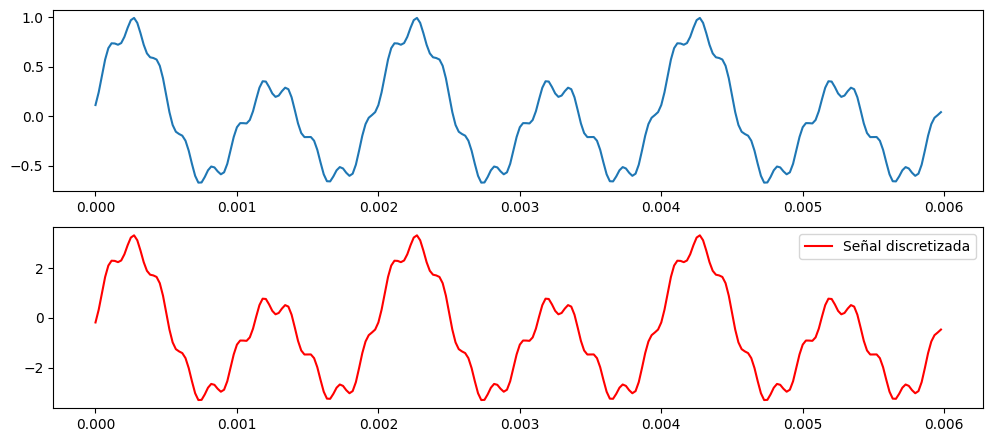

[-3.3        -3.08709677 -2.87419355 -2.66129032 -2.4483871  -2.23548387
 -2.02258065 -1.80967742 -1.59677419 -1.38387097 -1.17096774 -0.95806452
 -0.74516129 -0.53225806 -0.31935484 -0.10645161  0.10645161  0.31935484
  0.53225806  0.74516129  0.95806452  1.17096774  1.38387097  1.59677419
  1.80967742  2.02258065  2.23548387  2.4483871   2.66129032  2.87419355
  3.08709677  3.3       ]


Text(0, 0.5, 'Amplitud')

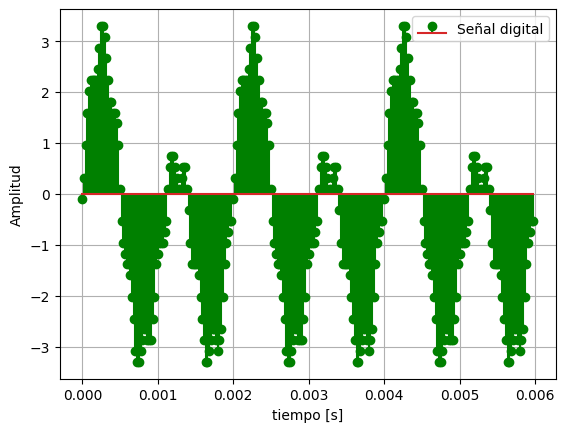

In [26]:
#==================================================
#         USANDO UN NUEVO ADC (ASEGURANDO NYQUIST)
#==================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

A=0.3
B=0.6
C=0.1
phi1=np.pi/4
phi2=np.pi

#DEFINICION DE LAS FRECUENCIAS
w1=1000*np.pi
w2=2000*np.pi
w3=11000*np.pi

T1= 2*np.pi/w1
T2= 2*np.pi/w2
T3= 2*np.pi/w3

F1= w1/(2*np.pi)
F2= w2/(2*np.pi)
F3= w3/(2*np.pi)

Fs=8*max(F1,F2,F3) # FRECUENCIA DE MUESTREO CON NYQUIST ASEGURADO (SIN ALIASING)
Ts=1/Fs

#DEFINICION DEL VECTOR TIEMPO
t=np.arange(0,3/500,Ts) #Esto asegura que se encuentre por lo menos en 3ciclos el  rango de la componente de frecuencia más baja en este caso es w1=1000 y f1 min= 500Hz luego 3T=3/F1 =3/500

#DEFINICIÓN DE LA SEÑAL
x_t=A*np.cos(w1*t-phi1)+B*np.sin(w2*t)+C*np.cos(w3*t-phi2)

#GRAFICA DE LA SEÑAL SIN DISCRETIZAR
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="Señal continua")
plt.legend
#DISCRETIZANDO CON NYQUIST
ymin=-3.3
ymax=3.3

def ceroypendiente(xt,ymin,ymax):
    xmax=max(xt)
    xmin=min(xt)
    m=(ymax-ymin)/(xmax-xmin)
    c=ymin-m*xmin
    yv=m*xt+c
    return yv

yv=ceroypendiente(x_t,ymin=-3.3,ymax=3.3)

plt.subplot(3, 1, 2)
plt.plot(t, yv, label="Señal discretizada", color='r')
plt.legend()
plt.show()

#AHORA CUANTIZACIÓN DE LA SEÑAL
bits=5
rmin=-3.3
rmax=3.3
K1=2**bits
vq=np.linspace(rmin,rmax,K1) #Vector de cuantización
print(vq)

def cuantizacion(yn,vq):
  Ne=vq.shape[0]
  dn=cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind=np.argmin(dn)
  return vq[ind]

yq1=[]
for i in range(yv.shape[0]):
  if i==0:
    yq1=cuantizacion(yv[i],vq)
  else:
    yq1=np.append(yq1,cuantizacion(yv[i],vq))

plt.stem(t,yq1,label='Señal digital', markerfmt='g',linefmt='g')
plt.legend()
plt.grid()
plt.xlabel('tiempo [s]')
plt.ylabel('Amplitud')



Con esto se observa que al cumplir con el teorema de Nyquist para la frecuencia, no solo se evita la distorsion o malformacion de la señal si no que tambien se evita perder información necesaria para analizar la señal, con el numero de muestras a tomar, en este caso se tiene un valor de frecuencia de muestreo demasiado alto, lo suficiente para observar mejor el comportamiento de la señal x(t)

##PUNTO 2:

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

Para hacer este punto se dividirá en dos partes, la primera parte es la evaluación del sistema ante la entrada y la salida

In [28]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-06 04:21:06--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 142.251.16.101, 142.251.16.100, 142.251.16.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 04:21:06--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s

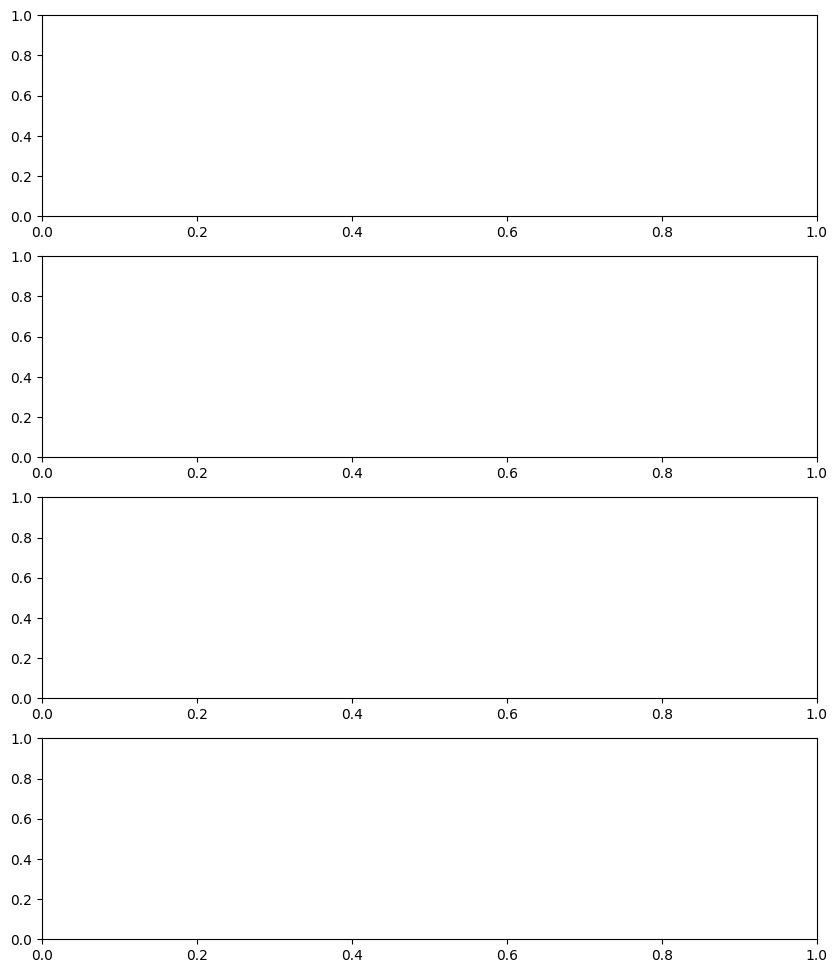

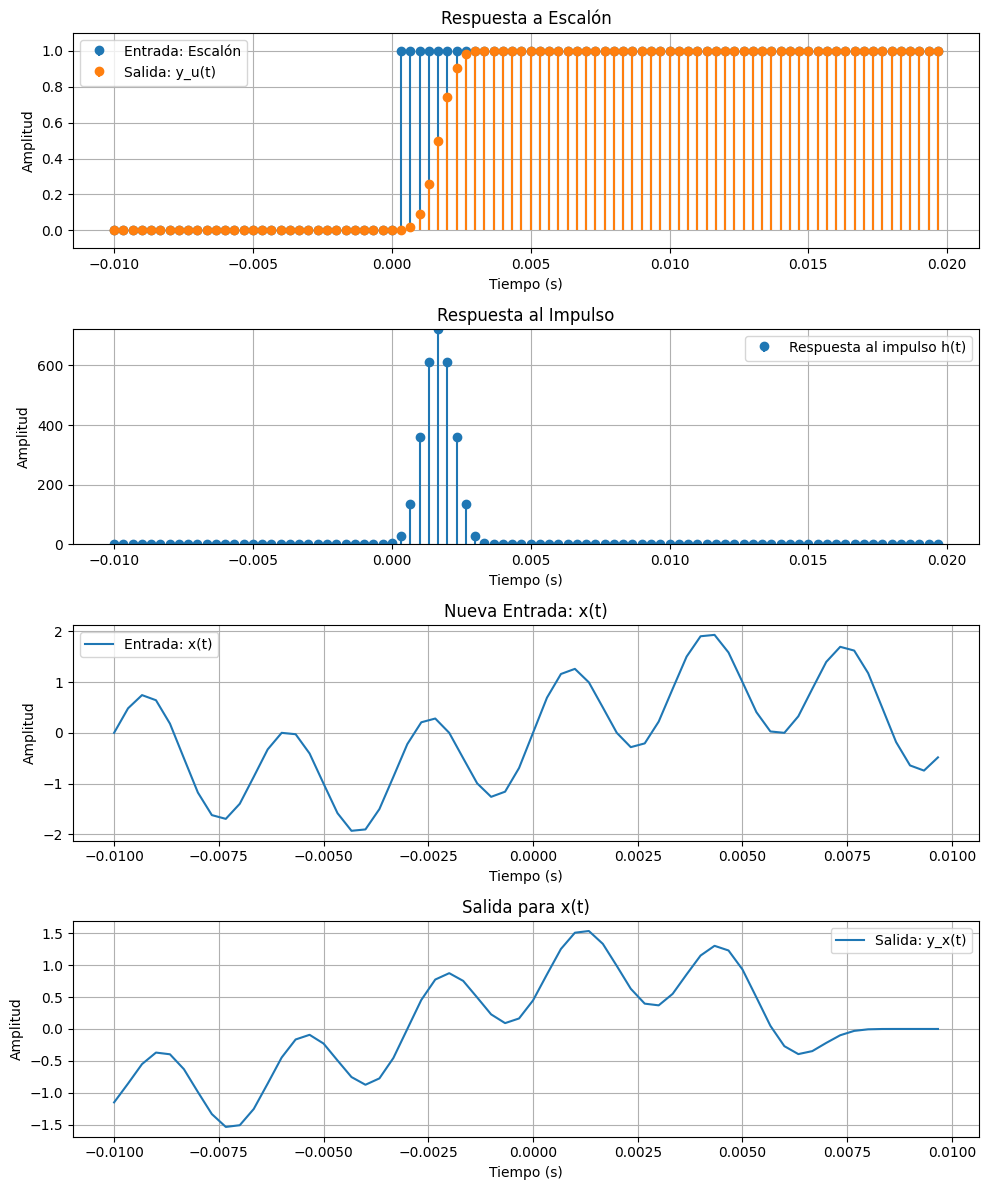

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from P1_model import system_
from scipy.signal import convolve, hilbert

# Inicialización del sistema
my_system = system_.My_System()
my_system.create_()
fs = 3*my_system.fs  # Frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo

# 1. Señal escalón (Heaviside)
signal_u = np.heaviside(t, 1)  # Función Heaviside
y_u = my_system.predict(signal_u)

# 2. Verificación de invariancia en el tiempo
desplazamiento = int(0.005 * fs)  # Desplazamos 5 ms
signal_u_despl = np.roll(signal_u, desplazamiento)
y_u_despl = my_system.predict(signal_u_despl)

# 3. Cálculo de la respuesta al impulso (si es SLIT)
# Diferenciación para obtener h(t)
h_t = np.gradient(y_u, t)

# 4. Cálculo de la salida para x(t) = sin(100πt) + sin(600πt)
t_new = np.arange(-0.01, 0.01, 1/fs)
signal_x = np.sin(100 * np.pi * t_new) + np.sin(600 * np.pi * t_new)
y_x = convolve(signal_x, h_t, mode='same') * (1/fs)

# Visualización de las señales
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Visualización de las señales
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Eliminando 'use_line_collection' de los gráficos de tipo stem
axs[0].stem(t, signal_u, label='Entrada: Escalón', basefmt=" ")
axs[0].stem(t, y_u, label='Salida: y_u(t)', basefmt=" ", linefmt='C1-', markerfmt='C1o')
axs[0].set_title('Respuesta a Escalón')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
# Ajustar los límites del eje y si es necesario
axs[0].set_ylim([min(signal_u.min(), y_u.min()) - 0.1, max(signal_u.max(), y_u.max()) + 0.1])

axs[1].stem(t, h_t, label='Respuesta al impulso h(t)', basefmt=" ")
axs[1].set_title('Respuesta al Impulso')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
# Ajustar los límites del eje y si es necesario
axs[1].set_ylim([h_t.min() - 0.1, h_t.max() + 0.1])


axs[2].plot(t_new, signal_x, label='Entrada: x(t)')
axs[2].set_title('Nueva Entrada: x(t)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Amplitud')
axs[2].legend()
axs[2].grid()

axs[3].plot(t_new, y_x, label='Salida: y_x(t)')
axs[3].set_title('Salida para x(t)')
axs[3].set_xlabel('Tiempo (s)')
axs[3].set_ylabel('Amplitud')
axs[3].legend()
axs[3].grid()

plt.tight_layout()
plt.show()


Como podemos apreciar en el grafico se corroboró que el sistema fuera lineal e invariante en el tiempo, de ahí que ante una señal discreta se pudiera hallar la salida con la respuesta impulso calculada previamente, de modo que para hallar dicha salida se usó la convolución discreta, es decir como bien se explicó en clase la derivada en tiempo discreto resulta ser una diferencia entre puntos.
Como en las señales de entrada y salida del sistema se basaban en muestreos determinados por t=1/fs significa que todo se trabajó en tiempo discreto y por ende solo se debia realizar las operaciones adecuadas, en el caso de la salida ante una entrada discreta y una respuesta impulso discreta, la convolución que se aplica es la discreta, por ello se utiliza numpy en vez de scipy.

En el caso de la nueva señal de entrada discreta x[n] se muestra así con poca información por la frecuencia de muestreo que ya viene determinada por la libreria P1_model.

Si se revisa el codigo lo que decidí agregar fue que a la freuencia de muestreo determianda la multiplique por un valor entero superior a 2 para que cumpliera con el teorema de Nyquist (Para estar Seguro)